In [7]:
import logging

# Configure logging for Jupyter Notebook
logging.basicConfig(level=logging.INFO, format='%(message)s')

def calculate_max_drawdown(portfolio_values):
    peak = -float('inf')
    max_drawdown = 0
    for value in portfolio_values:
        if value > peak:
            peak = value
        drawdown = (peak - value) / peak if peak != 0 else 0
        print(value, peak, drawdown)
        max_drawdown = max(max_drawdown, drawdown)
        print(max_drawdown)
    return max_drawdown

# Example test values for portfolio
portfolio_values = [100, 120, 90, 80, 110, 130, 100]

# Calculate maximum drawdown
max_drawdown = calculate_max_drawdown(portfolio_values)
logging.info(f"Maximum Drawdown: {max_drawdown:.2%}")


Maximum Drawdown: 33.33%


100 100 0.0
0
120 120 0.0
0
90 120 0.25
0.25
80 120 0.3333333333333333
0.3333333333333333
110 120 0.08333333333333333
0.3333333333333333
130 130 0.0
0.3333333333333333
100 130 0.23076923076923078
0.3333333333333333


In [13]:
import numpy as np 

def calculate_sortino_ratio(portfolio_values, risk_free_rate=0.02):
    returns = [(portfolio_values[i] / portfolio_values[i - 1]) - 1 for i in range(1, len(portfolio_values))]
    downside_returns = [r for r in returns if r < 0]
    avg_return = np.mean(returns) - risk_free_rate / 252  # Daily risk-free rate adjustment
    downside_std = np.std(downside_returns)
    sortino_ratio = avg_return / downside_std if downside_std != 0 else 0
    return sortino_ratio


In [15]:

# Calculate Sortino Ratio
sortino_ratio = calculate_sortino_ratio(portfolio_values)
logging.info(f"Sortino Ratio: {sortino_ratio:.2f}")


Sortino Ratio: 0.45


In [33]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [57]:
def get_prices_from_yfinance(universe, start_date, end_date):
    data = yf.download(universe, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
    prices = {}
    for stock in universe:
        if 'Adj Close' in data.columns.levels[1]:
            prices[stock] = data[stock]['Adj Close']
    # Convertir les prix en DataFrame
    prices_df = pd.DataFrame(prices)
    # Supprimer les valeurs manquantes
    prices_df.dropna(inplace=True)
    print(prices_df.head())  # Ajout pour afficher les premières lignes
    return prices_df

In [67]:
data = yf.download('AAPL, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
print(data)

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2020-01-02   71.799873   72.856613   71.545387   72.796021  135480400
2020-01-03   72.020424   72.851753   71.862884   72.088287  146322800
2020-01-06   71.206062   72.701485   70.953995   72.662704  118387200
2020-01-07   72.672417   72.929329   72.100426   72.320984  108872000
2020-01-08   72.022858   73.787315   72.022858   73.484352  132079200
...                ...         ...         ...         ...        ...
2020-12-24  128.411916  130.504525  128.196787  129.047516   54930100
2020-12-28  131.022819  134.298625  130.553438  133.663025  124486200
2020-12-29  134.992887  135.716491  131.365039  131.883301  121047300
2020-12-30  132.577585  132.978509  130.445853  130.758774   96452100
2020-12-31  131.110820  131.756208  128.803081  129.751602   99116600

[253 rows x 5 colum

In [69]:
def get_prices_from_yfinance(universe, start_date, end_date):
    print(f"Récupération des données pour {universe} de {start_date} à {end_date}...")
    data = yf.download(universe, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
    print("Données brutes téléchargées :")
    print(data.head())  # Vérifie les données brutes

    # Si les données existent, procède à leur traitement
    if not data.empty:
        prices = {}
        for stock in universe:
            if 'Close' in data.columns.levels[1]:  # Vérifie pour 'Close'
                prices[stock] = data[stock]['Close']  # Utilise 'Close'
        prices_df = pd.DataFrame(prices)
        prices_df.dropna(inplace=True)
        print("Aperçu des prix nettoyés :")
        print(prices_df.head())
        return prices_df
    else:
        print("Aucune donnée disponible.")
        return pd.DataFrame()  # Retourne un DataFrame vide si aucune donnée n'est disponible


In [71]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

prices = get_prices_from_yfinance(['AAPL'], start_date, end_date)
print(prices)


[*********************100%***********************]  1 of 1 completed

Récupération des données pour ['AAPL'] de 2020-01-01 00:00:00 à 2021-01-01 00:00:00...
Données brutes téléchargées :
Ticker           AAPL                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.799873  72.856613  71.545387  72.796021  135480400
2020-01-03  72.020424  72.851753  71.862884  72.088287  146322800
2020-01-06  71.206062  72.701485  70.953995  72.662704  118387200
2020-01-07  72.672417  72.929329  72.100426  72.320984  108872000
2020-01-08  72.022858  73.787315  72.022858  73.484352  132079200
Aperçu des prix nettoyés :
                 AAPL
Date                 
2020-01-02  72.796021
2020-01-03  72.088287
2020-01-06  72.662704
2020-01-07  72.320984
2020-01-08  73.484352
                  AAPL
Date                  
2020-01-02   72.796021
2020-01-03   72.088287
2020-01-06   72.662704
2020-01-07   72.320984
2020-01-08   73.484352
...          

Bienvenue dans le sélecteur d'actions !
Voici quelques actions populaires :
AAPL, MSFT, GOOGL, AMZN, META, TSLA, NVDA, INTC, CSCO, NFLX


Entrez les tickers des actions que vous voulez inclure, séparés par des virgules (ou appuyez sur Entrée pour tout sélectionner) :  AAPL


[*********************100%***********************]  1 of 1 completed

Vous avez sélectionné : AAPL
Lancement du backtest de 2020-01-01 à 2021-01-01 avec l'univers: ['AAPL']
Récupération des données pour ['AAPL'] de 2020-01-01 00:00:00 à 2021-01-01 00:00:00...
Données brutes téléchargées :
Ticker           AAPL                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.799873  72.856613  71.545387  72.796021  135480400
2020-01-03  72.020424  72.851753  71.862884  72.088287  146322800
2020-01-06  71.206062  72.701485  70.953995  72.662704  118387200
2020-01-07  72.672417  72.929329  72.100426  72.320984  108872000
2020-01-08  72.022858  73.787315  72.022858  73.484352  132079200
Aperçu des prix nettoyés :
                 AAPL
Date                 
2020-01-02  72.796021
2020-01-03  72.088287
2020-01-06  72.662704
2020-01-07  72.320984
2020-01-08  73.484352
Valeur totale du portefeuille à 2020-01-31 00:00:00: 0
Portefeuille réé


/var/folders/8g/gx949f0j18q9wrgxrcr83psh0000gn/T/ipykernel_10206/3393595900.py:88: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for date in pd.date_range(self.initial_date, self.final_date, freq='M'):


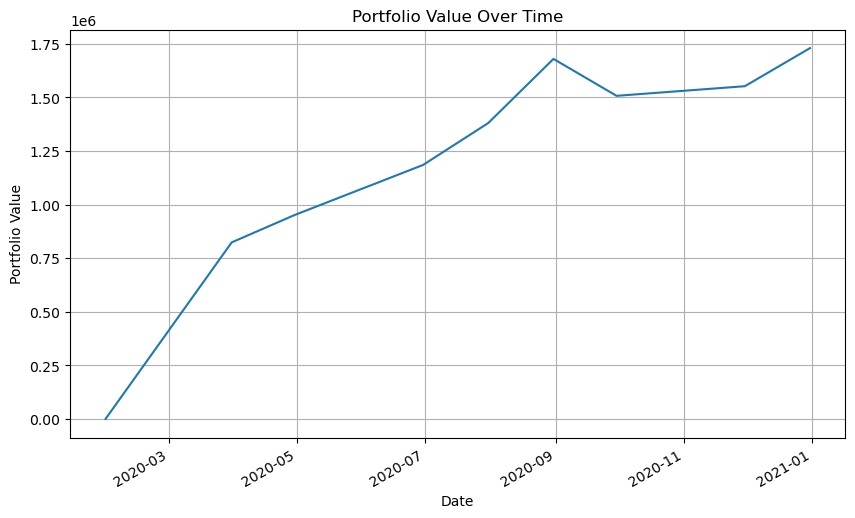

In [90]:
import logging
from datetime import datetime, timedelta
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from typing import List

# Classe Broker pour gérer les transactions
class Broker:
    def __init__(self, cash: int, verbose: bool = True):
        self.cash = cash
        self.verbose = verbose
        self.transactions = []
        self.portfolio = {}  # Quantités détenues
        self.portfolio_values = []

    def execute_portfolio(self, portfolio, prices, date):
        # Calculer la valeur totale du portefeuille à partir des quantités existantes
        portfolio_value = 0
        for stock in self.portfolio:
            if stock in prices:
                stock_value = self.portfolio[stock] * prices[stock]
                portfolio_value += stock_value

        # Ajouter la valeur totale à la liste pour le suivi
        self.portfolio_values.append((date, portfolio_value))
        print(f"Valeur totale du portefeuille à {date}: {portfolio_value}")

        # Rééquilibrer si nécessaire
        if portfolio:
            total_value = portfolio_value + self.cash
            for stock in portfolio:
                if stock in prices:
                    # Calculer la quantité à acheter/vendre
                    target_value = total_value * portfolio[stock]
                    self.portfolio[stock] = target_value / prices[stock]

            # Mettre à jour le cash (reste inchangé dans cette simulation)
            self.cash = 0

        if self.verbose:
            print(f"Portefeuille rééquilibré pour {date}: {self.portfolio}")
            print(f"Nouvelle valeur totale du portefeuille : {portfolio_value}")

    def get_portfolio_values(self):
        return pd.DataFrame(self.portfolio_values, columns=['Date', 'Portfolio Value'])

# Fonction pour récupérer les prix réels
def get_prices_from_yfinance(universe, start_date, end_date):
    print(f"Récupération des données pour {universe} de {start_date} à {end_date}...")
    data = yf.download(universe, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
    print("Données brutes téléchargées :")
    print(data.head())  # Vérifie les données brutes

    # Si les données existent, procède à leur traitement
    if not data.empty:
        prices = {}
        for stock in universe:
            if 'Close' in data.columns.levels[1]:  # Vérifie pour 'Close'
                prices[stock] = data[stock]['Close']  # Utilise 'Close'
        prices_df = pd.DataFrame(prices)
        prices_df.dropna(inplace=True)
        print("Aperçu des prix nettoyés :")
        print(prices_df.head())
        return prices_df
    else:
        print("Aucune donnée disponible.")
        return pd.DataFrame()  # Retourne un DataFrame vide si aucune donnée n'est disponible

# Classe pour le backtest
@dataclass
class Backtest:
    initial_date: datetime
    final_date: datetime
    universe: List[str]
    initial_cash: int = 1000000

    def run(self):
        print(f"Lancement du backtest de {self.initial_date.strftime('%Y-%m-%d')} à {self.final_date.strftime('%Y-%m-%d')} avec l'univers: {self.universe}")
        # Récupération des prix réels
        prices_df = get_prices_from_yfinance(self.universe, self.initial_date, self.final_date)
        broker = Broker(cash=self.initial_cash, verbose=True)

        # Initialisation du portefeuille avec une répartition égale
        portfolio = {stock: 1 / len(self.universe) for stock in self.universe}

        for date in pd.date_range(self.initial_date, self.final_date, freq='M'):
            if date in prices_df.index:
                current_prices = prices_df.loc[date].to_dict()
                broker.execute_portfolio(portfolio, current_prices, date)

        print("Backtest terminé !")
        self.plot_results(broker)

    def plot_results(self, broker):
        df = broker.get_portfolio_values()
        df.set_index('Date', inplace=True)

        # Forcer la conversion en numérique
        df['Portfolio Value'] = pd.to_numeric(df['Portfolio Value'], errors='coerce')

        # Supprimer les lignes avec des valeurs manquantes
        df.dropna(subset=['Portfolio Value'], inplace=True)

        # Tracer les données
        df['Portfolio Value'].plot(title='Portfolio Value Over Time', figsize=(10, 6))
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.grid()
        plt.show()

# Fonction pour permettre à l'utilisateur de choisir ses actions
def user_choose_stocks():
    print("Bienvenue dans le sélecteur d'actions !")
    print("Voici quelques actions populaires :")
    default_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
    print(", ".join(default_stocks))

    stocks = input("Entrez les tickers des actions que vous voulez inclure, séparés par des virgules (ou appuyez sur Entrée pour tout sélectionner) : ")
    if not stocks.strip():
        print("Aucune action spécifiée, utilisation de l'univers par défaut.")
        return default_stocks

    selected_stocks = [stock.strip().upper() for stock in stocks.split(',')]
    print(f"Vous avez sélectionné : {', '.join(selected_stocks)}")
    return selected_stocks

# Fonction principale pour exécuter le programme
def main():
    # Choix des actions par l'utilisateur
    universe = user_choose_stocks()

    # Dates du backtest
    initial_date = datetime(2020, 1, 1)
    final_date = datetime(2021, 1, 1)

    # Création du backtest
    backtest = Backtest(initial_date=initial_date, final_date=final_date, universe=universe)

    # Lancement du backtest
    backtest.run()

if __name__ == "__main__":
    main()


In [102]:
import pandas as pd
import logging
from dataclasses import dataclass
from datetime import datetime

import os 
import pickle
from pybacktestchain.data_module import UNIVERSE_SEC, FirstTwoMoments, get_stocks_data, DataModule, Information
from pybacktestchain.utils import generate_random_name
from pybacktestchain.blockchain import Block, Blockchain
from numba import jit 

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
from datetime import timedelta, datetime


def compute_information(self, t : datetime):
        # Get the data module 
        data = self.slice_data(t)
        # the information set will be a dictionary with the data
        information_set = {}

        # sort data by ticker and date
        data = data.sort_values(by=[self.company_column, self.time_column])

        # expected return per company
        data['return'] =  data.groupby(self.company_column)[self.adj_close_column].pct_change() #.mean()
        
        # expected return by company 
        information_set['expected_return'] = data.groupby(self.company_column)['return'].mean().to_numpy()


#---------------------------------------------------------
# Classes
#---------------------------------------------------------

@dataclass
class Position:
    ticker: str
    quantity: int
    entry_price: float

@dataclass
class Broker:
    cash: float 
    positions: dict = None
    transaction_log: pd.DataFrame = None
    entry_prices: dict = None
    verbose: bool = True

    def initialize_blockchain(self, name: str):
        # Check if the blockchain is already initialized and stored in the blockchain folder
        # if folder blockchain does not exist, create it
        if not os.path.exists('blockchain'):
            os.makedirs('blockchain')
        chains = os.listdir('blockchain')
        ending = f'{name}.pkl'
        if ending in chains:
            if self.verbose:
                logging.warning(f"Blockchain with name {name} already exists. Please use a different name.")
            with open(f'blockchain/{name}.pkl', 'rb') as f:
                self.blockchain = pickle.load(f)
            return

        self.blockchain = Blockchain(name)
        # Store the blockchain
        self.blockchain.store()

        if self.verbose:
            logging.info(f"Blockchain with name {name} initialized and stored in the blockchain folder.")

    def __post_init__(self):
        # Initialize positions as a dictionary of Position objects
        if self.positions is None:
            self.positions = {}
        # Initialize the transaction log as an empty DataFrame if none is provided
        if self.transaction_log is None:
            self.transaction_log = pd.DataFrame(columns=['Date', 'Action', 'Ticker', 'Quantity', 'Price', 'Cash'])
    

        # Initialize the entry prices as a dictionary
        if self.entry_prices is None:
            self.entry_prices = {}

    def buy(self, ticker: str, quantity: int, price: float, date: datetime):
        """Executes a buy order for the specified ticker."""
        total_cost = price * quantity
        if self.cash >= total_cost:
            self.cash -= total_cost
            if ticker in self.positions:
                position = self.positions[ticker]
                new_quantity = position.quantity + quantity
                new_entry_price = ((position.entry_price * position.quantity) + (price * quantity)) / new_quantity
                position.quantity = new_quantity
                position.entry_price = new_entry_price
            else:

                self.positions[ticker] = Position(ticker, quantity, price)
            self.log_transaction(date, 'BUY', ticker, quantity, price)
            self.entry_prices[ticker] = price
        else:
            if self.verbose:
                logging.warning(f"Not enough cash to buy {quantity} shares of {ticker} at {price}. Available cash: {self.cash}")
    
    def sell(self, ticker: str, quantity: int, price: float, date: datetime):
        """Executes a sell order for the specified ticker."""
        if ticker in self.positions and self.positions[ticker].quantity >= quantity:
            position = self.positions[ticker]
            position.quantity -= quantity
            self.cash += price * quantity

            if position.quantity == 0:
                del self.positions[ticker]
                del self.entry_prices[ticker]
            self.log_transaction(date, 'SELL', ticker, quantity, price)
        else:
            if self.verbose:
                logging.warning(f"Not enough shares to sell {quantity} shares of {ticker}. Position size: {self.positions.get(ticker, 0)}")
    
    def log_transaction(self, date, action, ticker, quantity, price):
        """Logs the transaction."""
        transaction = pd.DataFrame([{
            'Date': date,
            'Action': action,
            'Ticker': ticker,
            'Quantity': quantity,
            'Price': price,
            'Cash': self.cash
        }])

        self.transaction_log = pd.concat([self.transaction_log, transaction], ignore_index=True)

    def get_cash_balance(self):
        return self.cash

    def get_transaction_log(self):
        return self.transaction_log

    def get_portfolio_value(self, market_prices: dict):
        """Calculates the total portfolio value based on the current market prices."""
        portfolio_value = self.cash
        for ticker, position in self.positions.items():
            portfolio_value += position.quantity * market_prices[ticker]
        return portfolio_value
    
    def execute_portfolio(self, portfolio: dict, prices: dict, date: datetime):
        """Executes the trades for the portfolio based on the generated weights."""
        
        # First, handle all the sell orders to free up cash
        for ticker, weight in portfolio.items():
            price = prices.get(ticker)
            if price is None:
                if self.verbose:
                    logging.warning(f"Price for {ticker} not available on {date}")
                continue
            
            total_value = self.get_portfolio_value(prices)
            target_value = total_value * weight
            current_value = self.positions.get(ticker, Position(ticker, 0, 0)).quantity * price
            diff_value = target_value - current_value
            quantity_to_trade = int(diff_value / price)
            
            if quantity_to_trade < 0:
                self.sell(ticker, abs(quantity_to_trade), price, date)
        
        # Then, handle all the buy orders, checking if there's enough cash
        for ticker, weight in portfolio.items():
            price = prices.get(ticker)
            if price is None:
                if self.verbose:
                    logging.warning(f"Price for {ticker} not available on {date}")
                continue
      
            total_value = self.get_portfolio_value(prices)
            target_value = total_value * weight
            current_value = self.positions.get(ticker, Position(ticker, 0, 0)).quantity * price
            diff_value = target_value - current_value
            quantity_to_trade = int(diff_value / price)
           
            if quantity_to_trade > 0:
                available_cash = self.get_cash_balance()
                cost = quantity_to_trade * price
                
                if cost <= available_cash:
                    self.buy(ticker, quantity_to_trade, price, date)
                else:
                    if self.verbose:
                        logging.warning(f"Not enough cash to buy {quantity_to_trade} of {ticker} on {date}. Needed: {cost}, Available: {available_cash}")
                        logging.info(f"Buying as many shares of {ticker} as possible with available cash.")
                    quantity_to_trade = int(available_cash / price)
                    self.buy(ticker, quantity_to_trade, price, date)

    def get_transaction_log(self):
        """Returns the transaction log."""
        return self.transaction_log

@dataclass
class RebalanceFlag:
    def time_to_rebalance(self, t: datetime):
        pass 

# Implementation of e.g. rebalancing at the end of each month
@dataclass
class EndOfMonth(RebalanceFlag):
    def time_to_rebalance(self, t: datetime):
        # Convert to pandas Timestamp for convenience
        pd_date = pd.Timestamp(t)
        # Get the last business day of the month
        last_business_day = pd_date + pd.offsets.BMonthEnd(0)
        # Check if the given date matches the last business day
        return pd_date == last_business_day

@dataclass
class RiskModel:
    def trigger_stop_loss(self, t: datetime, portfolio: dict, prices: dict):
        pass

@dataclass
class StopLoss(RiskModel):
    threshold: float = 0.1
    def trigger_stop_loss(self, t: datetime, portfolio: dict, prices: dict, broker: Broker):
        
        for ticker, position in list(broker.positions.items()):
            entry_price = broker.entry_prices[ticker]
            current_price = prices.get(ticker)
            if current_price is None:
                logging.warning(f"Price for {ticker} not available on {t}")
                continue
            # Calculate the loss percentage
            loss = (current_price - entry_price) / entry_price
            if loss < -self.threshold:
                logging.info(f"Stop loss triggered for {ticker} at {t}. Selling all shares.")
                broker.sell(ticker, position.quantity, current_price, t)
@dataclass
class Backtest:
    initial_date: datetime
    final_date: datetime
    universe = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
    information_class : type  = Information
    s: timedelta = timedelta(days=360)
    time_column: str = 'Date'
    company_column: str = 'ticker'
    adj_close_column : str ='Adj Close'
    rebalance_flag : type = EndOfMonth
    risk_model : type = StopLoss
    initial_cash: int = 1000000  # Initial cash in the portfolio
    name_blockchain: str = 'backtest'
    verbose: bool = True
    broker = Broker(cash=initial_cash, verbose=verbose)
    
    def __post_init__(self):
        self.backtest_name = generate_random_name()
        self.broker.initialize_blockchain(self.name_blockchain)

    def run_backtest(self):
        logging.info(f"Running backtest from {self.initial_date} to {self.final_date}.")
        logging.info(f"Retrieving price data for universe")
        self.risk_model = self.risk_model(threshold=0.1)
        # self.initial_date to yyyy-mm-dd format
        init_ = self.initial_date.strftime('%Y-%m-%d')
        # self.final_date to yyyy-mm-dd format
        final_ = self.final_date.strftime('%Y-%m-%d')
        df = get_stocks_data(self.universe, init_, final_)

        # Initialize the DataModule
        data_module = DataModule(df)

        # Create the Information object
        info = self.information_class(s = self.s, 
                                    data_module = data_module,
                                    time_column=self.time_column,
                                    company_column=self.company_column,
                                    adj_close_column=self.adj_close_column)
        
        # Run the backtest
        for t in pd.date_range(start=self.initial_date, end=self.final_date, freq='D'):
            
            if self.risk_model is not None:
                portfolio = info.compute_portfolio(t, info.compute_information(t))
                prices = info.get_prices(t)
                self.risk_model.trigger_stop_loss(t, portfolio, prices, self.broker)
           
            if self.rebalance_flag().time_to_rebalance(t):
                logging.info("-----------------------------------")
                logging.info(f"Rebalancing portfolio at {t}")
                information_set = info.compute_information(t)
                portfolio = info.compute_portfolio(t, information_set)
                prices = info.get_prices(t)
                self.broker.execute_portfolio(portfolio, prices, t)

        logging.info(f"Backtest completed. Final portfolio value: {self.broker.get_portfolio_value(info.get_prices(self.final_date))}")
        df = self.broker.get_transaction_log()

        # create backtests folder if it does not exist
        if not os.path.exists('backtests'):
            os.makedirs('backtests')

        # save to csv, use the backtest name 
        df.to_csv(f"backtests/{self.backtest_name}.csv")

        # store the backtest in the blockchain
        self.broker.blockchain.add_block(self.backtest_name, df.to_string())
    

In [104]:
initial_date = datetime(2020, 1, 1)
final_date = datetime(2021, 1, 1)

# Créer une instance de la classe Backtest
backtest = Backtest(
    initial_date=initial_date,
    final_date=final_date,
    verbose=True  # Vous pouvez définir verbose à True pour activer les logs détaillés
)

# Lancer le backtest
backtest.run_backtest()

Blockchain with name backtest already exists. Please use a different name.
Running backtest from 2020-01-01 00:00:00 to 2021-01-01 00:00:00.
Retrieving price data for universe
-----------------------------------
Rebalancing portfolio at 2020-01-31 00:00:00


AttributeError: 'NoneType' object has no attribute 'items'